<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

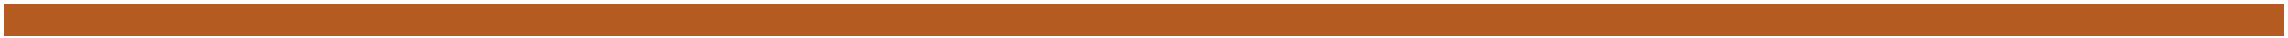

## <font color='#475468'> IE423 TASK5:</font>
### <font color='#475468'> Onur Erdoğan 21903313</font>

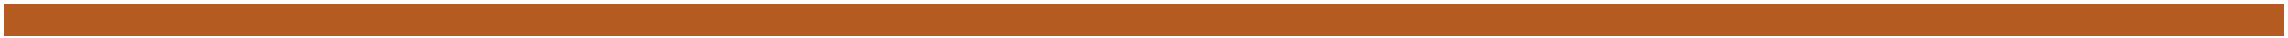

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dfDgt = pd.read_csv('/content/drive/MyDrive/yazokulu/mnist_fashion_train.csv')
dfDgt.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dfDgt.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [8]:
# Define target and features

y = dfDgt['label'].ravel()
X = scale(dfDgt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

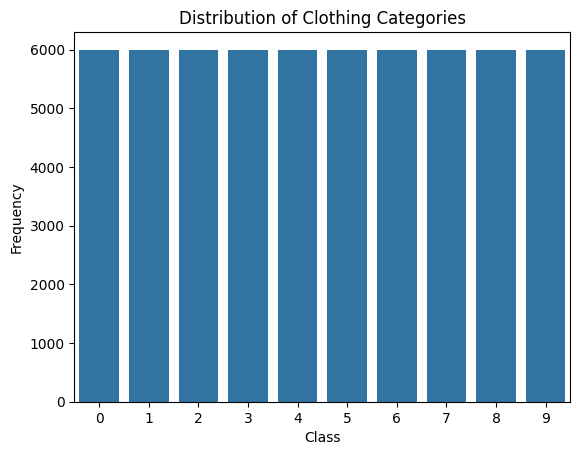

In [21]:
class_distribution = dfDgt['label'].value_counts()
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Clothing Categories')
plt.show()


It looks balanced and its ideal.

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


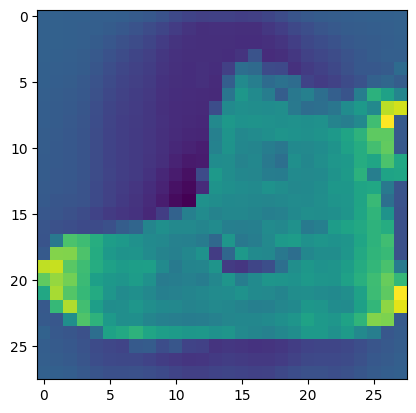

In [9]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

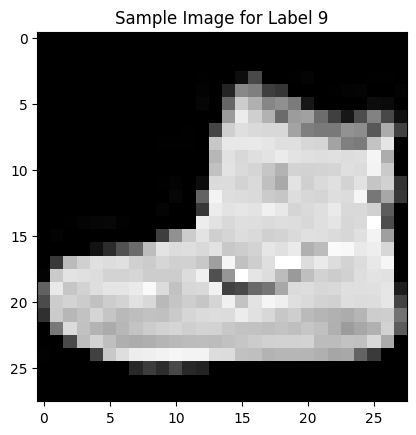

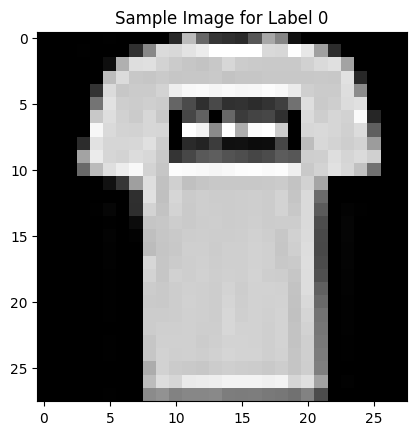

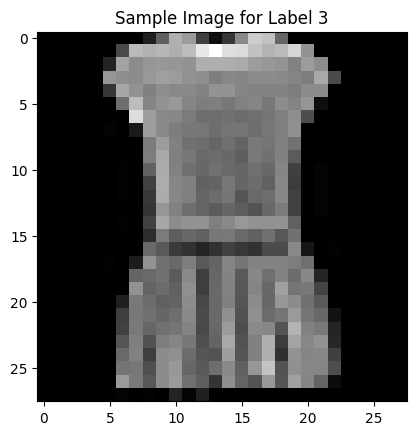

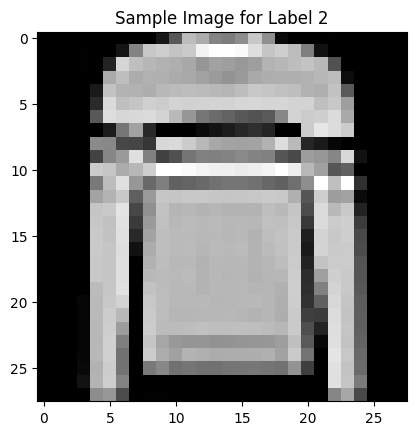

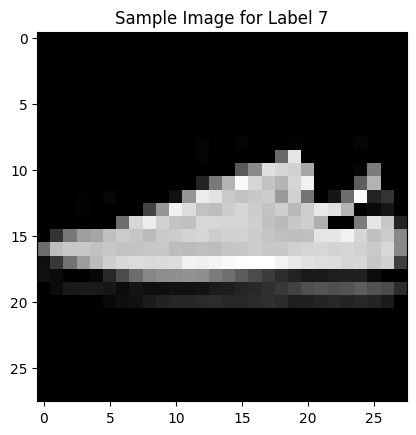

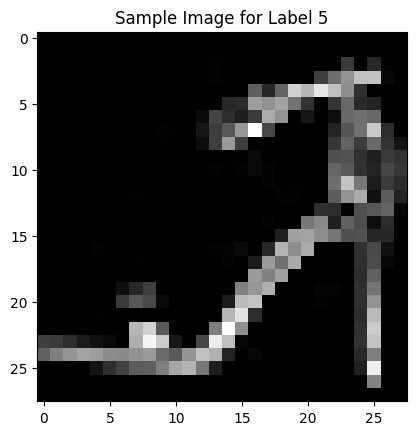

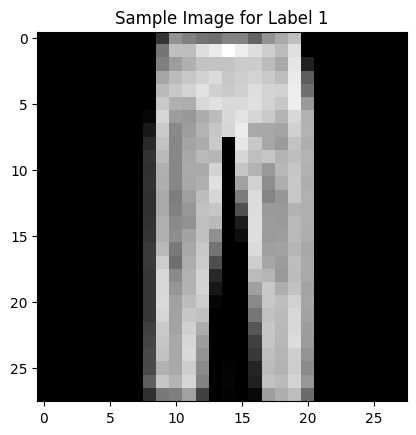

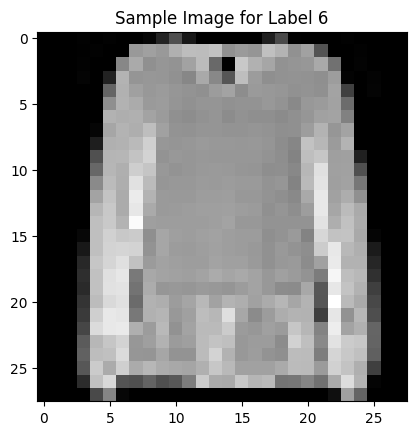

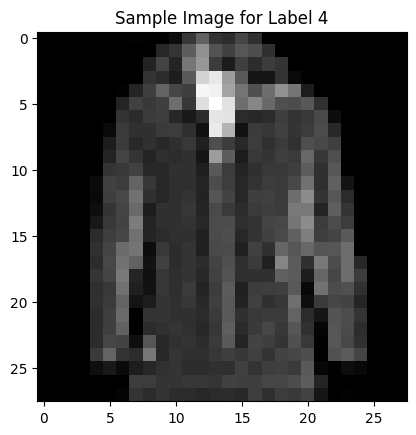

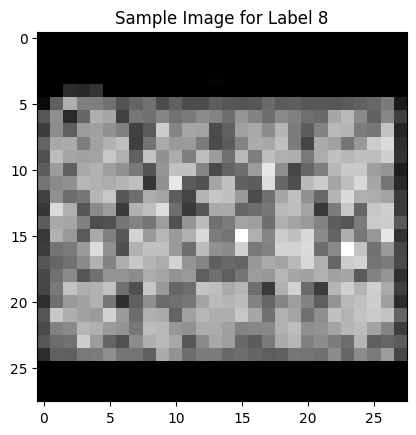

In [22]:
for label in dfDgt['label'].unique():
    sample_image = dfDgt[dfDgt['label'] == label].iloc[0, 1:].values.reshape(28, 28)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Sample Image for Label {label}')
    plt.show()


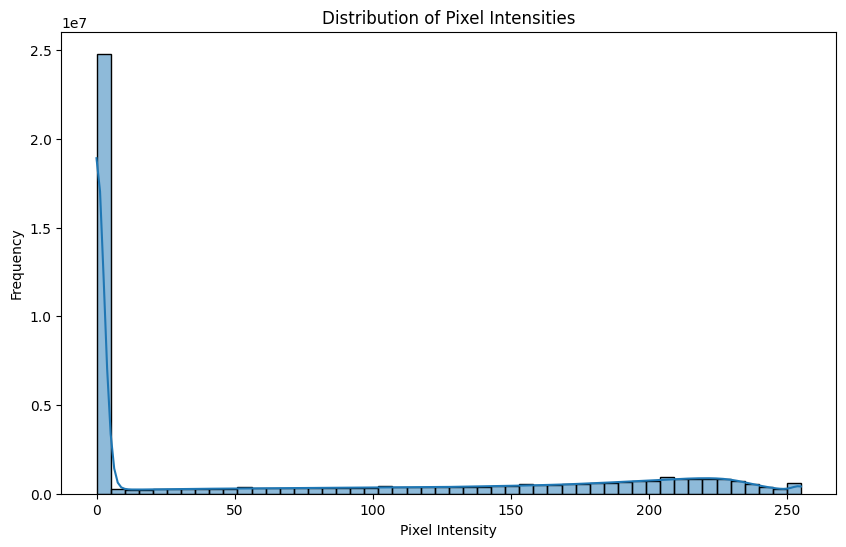

In [23]:
pixel_data = dfDgt.drop(columns=['label'])
plt.figure(figsize=(10, 6))
sns.histplot(pixel_data.values.flatten(), bins=50, kde=True)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Intensities')
plt.show()


The images tend to be black.. Maybe it can effect the model performance.

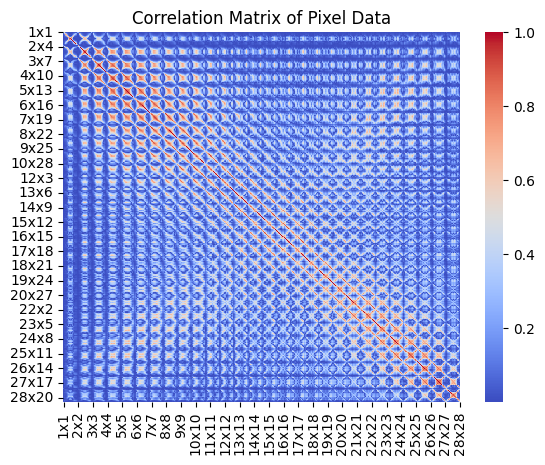

In [24]:
corr_matrix = pixel_data.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Pixel Data')
plt.show()


I thought it was gonna be helpfull but now I cannot see anything impactful.

<Axes: ylabel='count'>

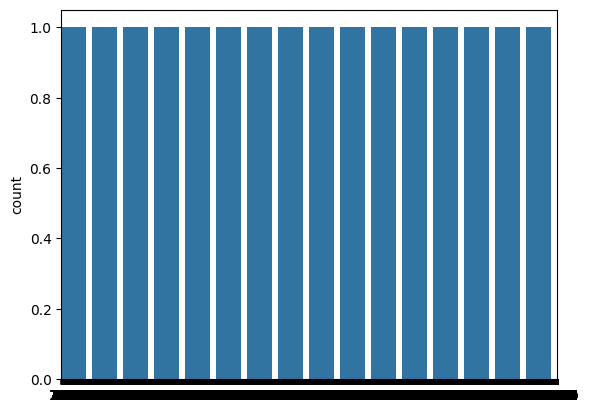

In [7]:
# Plot count of digit types
sns.countplot(y)

Again, I guess its perfectly balanced.

## Predict Digit from Handwriting
Since **SVM** is a tool we already know, let's start with that.

In [ ]:
# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

### Neural Network

In [9]:
# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1166
           1       0.98      0.98      0.98      1213
           2       0.80      0.78      0.79      1232
           3       0.90      0.87      0.89      1209
           4       0.79      0.84      0.82      1159
           5       0.96      0.95      0.96      1217
           6       0.70      0.71      0.70      1178
           7       0.93      0.95      0.94      1215
           8       0.97      0.95      0.96      1178
           9       0.95      0.96      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [12]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/yazokulu/mnist_fashion_test.csv'))


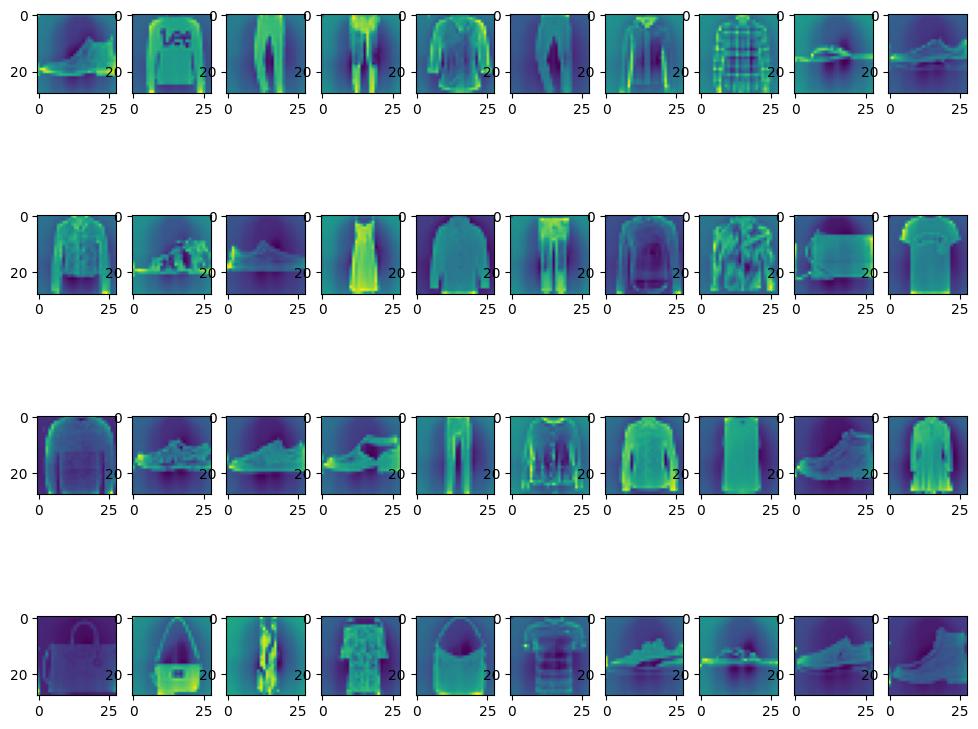

In [14]:
# View New Handwritten Images
plt.figure(figsize=(12,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score[i][:784].reshape((28,28)))
plt.show()

In [17]:
# Show predicted digits
print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncDgt.predict(X_score[i,:784].reshape(1,-1))[0], end=' ')

Predicted Digits (Neural Network):


9 2 1 1 6 6 2 6 0 7 

2 5 7 3 4 0 6 3 8 0 

4 7 7 5 1 2 8 6 9 4 

8 8 1 8 8 0 7 5 7 9 

utexas_ds_orie_divider_gray.png

In [18]:
# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1166
           1       0.98      0.98      0.98      1213
           2       0.81      0.81      0.81      1232
           3       0.90      0.88      0.89      1209
           4       0.81      0.83      0.82      1159
           5       0.96      0.96      0.96      1217
           6       0.74      0.69      0.71      1178
           7       0.95      0.94      0.94      1215
           8       0.96      0.96      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



### Cross Validation

In [19]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncDgt, X, y, cv=5)

array([0.88883333, 0.88458333, 0.8915    , 0.89416667, 0.88516667])

It looks good.